In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df=pd.read_csv("heart.csv")

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [28]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
x=df.drop(columns='target')
y=df['target']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import binarize

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree   import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [37]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
lr_y_predict=lr.predict(x_test)

In [38]:
print("The accuarcy is {}".format(accuracy_score(y_test,lr_y_predict)))

The accuarcy is 0.8668831168831169


<AxesSubplot:>

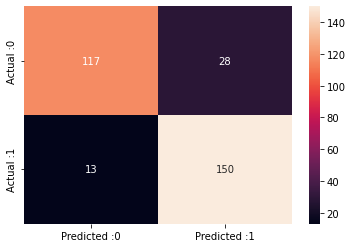

In [62]:
lr_cm=confusion_matrix(y_test,lr_y_predict)
lr_cmd=pd.DataFrame(lr_cm,index=['Actual :0','Actual :1'],columns=['Predicted :0','Predicted :1'])
sns.heatmap(lr_cmd,annot=True ,fmt='d')

In [61]:
print(classification_report(y_test,lr_y_predict))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       145
           1       0.84      0.92      0.88       163

    accuracy                           0.87       308
   macro avg       0.87      0.86      0.87       308
weighted avg       0.87      0.87      0.87       308



In [39]:
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_y_predict=nb.predict(x_test)

In [40]:
print("The accuarcy is {}".format(accuracy_score(y_test,nb_y_predict)))

The accuarcy is 0.8441558441558441


In [130]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn_y_predict=knn.predict(x_test)

In [131]:
print("The accuarcy is {}".format(accuracy_score(y_test,knn_y_predict)))

The accuarcy is 0.9902597402597403


[0.9902597402597403, 0.9253246753246753, 0.8863636363636364, 0.8084415584415584, 0.7435064935064936, 0.7402597402597403, 0.7467532467532467, 0.737012987012987, 0.7597402597402597]


(0.5, 1.0)

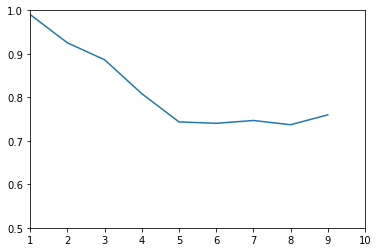

In [129]:
acc= []
for i in range(1,10):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    knn_y_predict2=knn2.predict(x_test)
    acc.append(accuracy_score(y_test,knn_y_predict2))
print(acc)
plt.plot(range(1,10),acc)
plt.xlim([1,10])
plt.ylim([0.5,1])

In [43]:
dct=DecisionTreeClassifier()
dct.fit(x_train,y_train)
dct_y_predict=dct.predict(x_test)

In [44]:
print("The accuarcy is {}".format(accuracy_score(y_test,dct_y_predict)))

The accuarcy is 1.0


In [46]:
rn_fr=RandomForestClassifier()
rn_fr.fit(x_train,y_train)
rn_fr_y_predict=rn_fr.predict(x_test)

In [124]:
print("The accuarcy is {}".format(accuracy_score(y_test,rn_fr_y_predict)))

The accuarcy is 1.0


In [148]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
svm_y_predict=svm.predict(x_test)

In [149]:
print("The accuarcy is {}".format(accuracy_score(y_test,svm_y_predict)))

The accuarcy is 0.8538961038961039


<AxesSubplot:title={'center':'SVM Confusion Matrix'}>

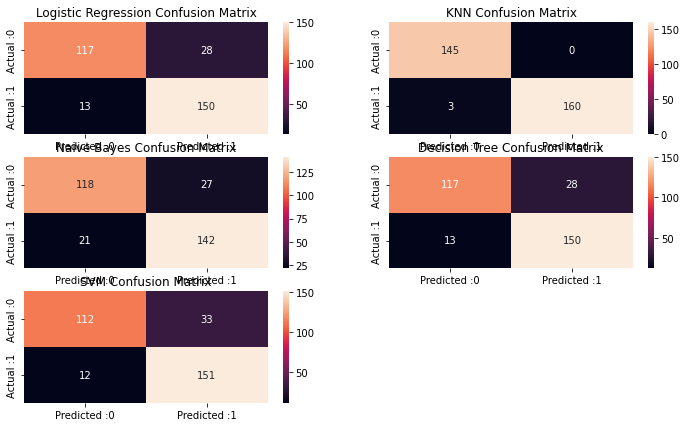

In [150]:
plt.figure(figsize=(12,7))

lr_cm=confusion_matrix(y_test,lr_y_predict)
lr_cmd=pd.DataFrame(lr_cm,index=['Actual :0','Actual :1'],columns=['Predicted :0','Predicted :1'])
plt.subplot(3,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lr_cmd,annot=True ,fmt='d')

knn_cm=confusion_matrix(y_test,knn_y_predict)
knn_cmd=pd.DataFrame(knn_cm,index=['Actual :0','Actual :1'],columns=['Predicted :0','Predicted :1'])
plt.subplot(3,2,2)
plt.title("KNN Confusion Matrix")
sns.heatmap(knn_cmd,annot=True ,fmt='d')

nb_cm=confusion_matrix(y_test,nb_y_predict)
nb_cmd=pd.DataFrame(nb_cm,index=['Actual :0','Actual :1'],columns=['Predicted :0','Predicted :1'])
plt.subplot(3,2,3)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(nb_cmd,annot=True ,fmt='d')

dct_cm=confusion_matrix(y_test,dct_y_predict)
dct_cmd=pd.DataFrame(lr_cm,index=['Actual :0','Actual :1'],columns=['Predicted :0','Predicted :1'])
plt.subplot(3,2,4)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(dct_cmd,annot=True ,fmt='d')

svm_cm=confusion_matrix(y_test,svm_y_predict)
svm_cmd=pd.DataFrame(svm_cm,index=['Actual :0','Actual :1'],columns=['Predicted :0','Predicted :1'])
plt.subplot(3,2,5)
plt.title("SVM Confusion Matrix")
sns.heatmap(svm_cmd,annot=True ,fmt='d')


In [59]:
from sklearn.metrics import roc_curve,classification_report

In [63]:
lr_y_pre_prob=lr.predict_proba(x_test)

In [70]:
lr_y_pre_prob

array([[0.11937432, 0.88062568],
       [0.23750318, 0.76249682],
       [0.9951405 , 0.0048595 ],
       [0.09088562, 0.90911438],
       [0.98840003, 0.01159997],
       [0.97833386, 0.02166614],
       [0.8446606 , 0.1553394 ],
       [0.99051328, 0.00948672],
       [0.95454193, 0.04545807],
       [0.31984591, 0.68015409],
       [0.5472025 , 0.4527975 ],
       [0.99896697, 0.00103303],
       [0.37547948, 0.62452052],
       [0.44128448, 0.55871552],
       [0.08998932, 0.91001068],
       [0.02508094, 0.97491906],
       [0.0268655 , 0.9731345 ],
       [0.99220953, 0.00779047],
       [0.00836098, 0.99163902],
       [0.79839313, 0.20160687],
       [0.07817717, 0.92182283],
       [0.12047307, 0.87952693],
       [0.24231341, 0.75768659],
       [0.12047307, 0.87952693],
       [0.02508094, 0.97491906],
       [0.04146962, 0.95853038],
       [0.01727038, 0.98272962],
       [0.22968854, 0.77031146],
       [0.01353693, 0.98646307],
       [0.00695474, 0.99304526],
       [0.

(array([84., 17.,  8., 10., 11., 20., 26., 31., 36., 65.]),
 array([0.00103303, 0.10061417, 0.2001953 , 0.29977644, 0.39935757,
        0.49893871, 0.59851984, 0.69810098, 0.79768211, 0.89726325,
        0.99684438]),
 <BarContainer object of 10 artists>)

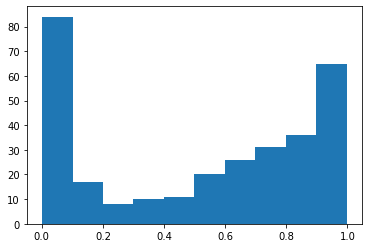

In [65]:
plt.hist(lr_y_pre_prob[:,1])

In [142]:
y_pred_thresh=binarize(lr_y_pre_prob,threshold=0.65)

In [143]:
y_thresh=y_pred_thresh[:,1]
y_thresh

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0.

In [144]:
accuracy_score(y_test,y_thresh)

0.8376623376623377

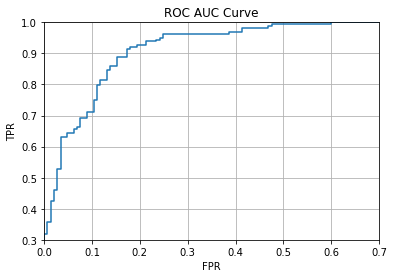

In [109]:
fpr,tpr,threshold=roc_curve(y_test,lr_y_pre_prob[:,1])
plt.plot(fpr[,tpr)
plt.ylim([0.3,1])
plt.xlim([0,0.7])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve")
plt.grid(True)

In [134]:
auc_df=pd.concat([pd.Series(fpr),pd.Series(tpr),pd.Series(threshold)],axis=1)
auc_df.columns=['fpr','tpr','threshold']
auc_df

,fpr,tpr,threshold
0,0.000000,0.000000,1.996844
1,0.000000,0.006135,0.996844
2,0.000000,0.018405,0.993067
3,0.000000,0.030675,0.993045
4,0.000000,0.042945,0.990399
...,...,...,...
135,0.917241,1.000000,0.004222
136,0.931034,1.000000,0.003899
137,0.958621,1.000000,0.003110
138,0.986207,1.000000,0.002671


In [114]:
threshold

array([1.99684438e+00, 9.96844382e-01, 9.93067263e-01, 9.93045256e-01,
       9.90399191e-01, 9.82729622e-01, 9.75371084e-01, 9.74919061e-01,
       9.73134504e-01, 9.72424849e-01, 9.71341391e-01, 9.70847147e-01,
       9.69547989e-01, 9.69365817e-01, 9.66493097e-01, 9.60882518e-01,
       9.52358119e-01, 9.49142207e-01, 9.48524233e-01, 9.47543545e-01,
       9.46944882e-01, 9.44806193e-01, 9.42209260e-01, 9.21822827e-01,
       9.15670893e-01, 9.09114378e-01, 9.08210670e-01, 9.01953065e-01,
       8.92121799e-01, 8.87535403e-01, 8.82238060e-01, 8.80625679e-01,
       8.79526929e-01, 8.52924894e-01, 8.45483210e-01, 8.44367848e-01,
       8.35910407e-01, 8.26169697e-01, 8.22515188e-01, 8.20377249e-01,
       8.19396443e-01, 8.07593925e-01, 7.79035659e-01, 7.70311459e-01,
       7.64676043e-01, 7.62496820e-01, 7.60073592e-01, 7.57730686e-01,
       7.57686594e-01, 7.54472345e-01, 7.54388512e-01, 7.48138697e-01,
       7.44817019e-01, 7.31236913e-01, 7.24594786e-01, 7.22100154e-01,
      

In [147]:
auc_df[auc_df.tpr> 0.3] 

,fpr,tpr,threshold
18,0.000000,0.306748,0.948524
19,0.000000,0.319018,0.947544
20,0.006897,0.319018,0.946945
21,0.006897,0.325153,0.944806
22,0.006897,0.337423,0.942209
...,...,...,...
135,0.917241,1.000000,0.004222
136,0.931034,1.000000,0.003899
137,0.958621,1.000000,0.003110
138,0.986207,1.000000,0.002671
